In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util import bath_correlation_function
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_linear as compute_exp_val_linear
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val_nonlinear
from src.hops import hops_trotter_simple
from src.hops import hops_rk_simple

In [3]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

# Linear HOPS

Without noise:


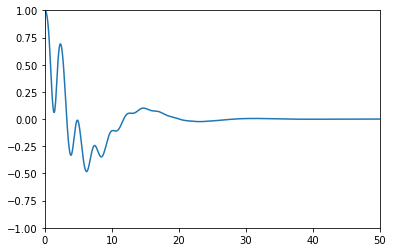

With noise:


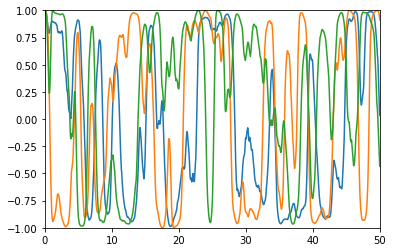

In [148]:
N_steps = 1000
N_trunc = 4

print("Without noise:")
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True, use_noise=False)
psis = hops.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True)
for i in range(3):
    psis = hops.compute_realizations(1)
    sigma_zs = compute_exp_val_linear(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [149]:
N_steps = 1000
N_trunc = 16

In [150]:
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True)

In [151]:
psis_linear_100 = hops.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [68]:
psis_linear_1000 = hops.compute_realizations(N_samples=1000, progressBar=tqdm)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [154]:
sigma_zs_linear_100 = compute_exp_val_linear(psis_linear_100, sigma_z)
sigma_zs_linear_1000 = compute_exp_val_linear(psis_linear_1000, sigma_z)

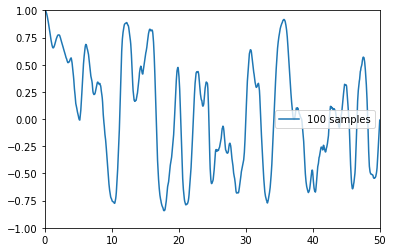

In [155]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_linear_100, label="100 samples")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_linear_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

# Non-Linear HOPS

Without noise:


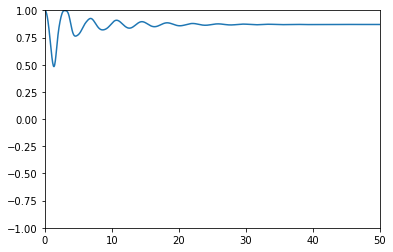

With noise:


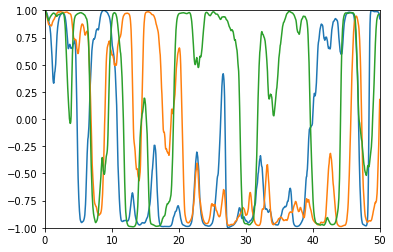

In [156]:
N_steps = 1000
N_trunc = 4

print("Without noise:")
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False)
psis = hops.compute_realizations(1)
sigma_zs = compute_exp_val_linear(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=False)
for i in range(3):
    psis = hops.compute_realizations(1)
    sigma_zs = compute_exp_val_linear(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [157]:
N_steps = 1000
N_trunc = 16

In [158]:
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=False)

In [180]:
psis_nonlinear_100 = hops.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
psis_nonlinear_1000 = hops.compute_realizations(N_samples=1000, progressBar=tqdm)

In [181]:
sigma_zs_nonlinear_100 = compute_exp_val_nonlinear(psis_nonlinear_100, sigma_z)
sigma_zs_nonlinear_1000 = compute_exp_val_nonlinear(psis_nonlinear_1000, sigma_z)

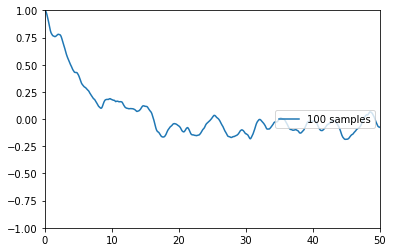

In [182]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_nonlinear_100, label="100 samples")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_nonlinear_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

# Fine-tuned comparison

In [73]:
N_steps = 1000
N_trunc = 30

In [74]:
hops_trotter = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=True)
hops_rk = hops_rk_simple.HOPS_Simple_RK4(g, w, h, L, duration, N_steps, N_trunc, linear=True)

In [75]:
zts = hops_rk.generator.sample_process()

In [76]:
psis_trotter = hops_trotter.compute_realizations(1, zts_debug=zts[0::2])
psis_rk = hops_rk.compute_realizations(1, zts_debug=zts)

/home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/hops/../../src/hops/runge_kutta.py:32: RuntimeWarning: invalid value encountered in multiply
  return y + 1/6*(k1 + 2*k2 + 2*k3 + k4)*dt


In [77]:
sigma_zs_trotter = compute_exp_val_linear(psis_trotter, sigma_z)
sigma_zs_rk = compute_exp_val_linear(psis_rk, sigma_z)

/home/benjamin/Documents/Uni/Informatik Bachelorarbeit/code/test/hops/../../src/util/stochastic_expectation_value.py:30: RuntimeWarning: invalid value encountered in cdouble_scalars
  result[i] = np.real_if_close(num/denom)


TypeError: can't convert complex to float

In [ ]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_trotter, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_rk, "--", label="HOMPS")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.show()

In [ ]:
figure, axarray = plt.subplots(1, 2, figsize=(15, 8))

axarray[0].plot(np.linspace(0, duration, N_steps), np.abs(psis_trotter[0, :, 0] - psis_rk[0, :, 0])/np.abs(psis_rk[0, :, 0]))
axarray[0].set_title(r"$\left|\Psi_0^{hops} - \Psi_0^{homps}\right|\quad/\quad\left|\Psi_0^{hops}\right|$")
axarray[0].set_yscale("log")

axarray[1].plot(np.linspace(0, duration, N_steps), np.abs(psis_trotter[0, :, 1] - psis_rk[0, :, 1])/np.abs(psis_rk[0, :, 1]))
axarray[1].set_title(r"$\left|\Psi_1^{hops} - \Psi_1^{homps}\right|\quad/\quad\left|\Psi_1^{hops}\right|$")
axarray[1].set_yscale("log")

plt.show()